<a href="https://colab.research.google.com/github/kauecapellato/Titanic_Case/blob/main/Titanic_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Neste projeto analisaremos um conjunto de dados com informações de passageiros do Titanic. Os dados podem ser baixados do site do Kaggle: https://www.kaggle.com/c/titanic/data

Os dados de treino contém 891 entradas e 12 features com informações de diversos passageiros do navio.

Nosso objetivo é desenvolver e avaliar o desempenho de um modelo preditivo de sobreviventes ao desastre, começando pela abertura dos dados, análise descritiva das variáveis, criação de insights e a modelagem preditiva de regressão.

#Importando as bibliotecas para a manipulação e visualização dos dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import files
from statsmodels.graphics.mosaicplot import mosaic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Carregando os dados e criando um Dataframe

Foi fornecido pelo site do Kaggle 3 arquivos: dados de treino, teste e como o arquivo final deveria parecer. A partir disso, criaremos um dataframe com os dados de treino para melhor visualização e análise das variáveis.  

A partir dos dados baixados do site em formato csv, criaremos um dataframe para facilitar a visualização e a manipulação dos dados mais para frente.

In [ ]:
# Realizamos o upload dos arquivos necessários
files.upload()


In [3]:
# Criando o Dataframe
treino = pd.read_csv('dados_treino.csv')

# Formato do Dataframe
treino.shape

(891, 12)

Assim, obervamos que o conjunto de dados possui 891 observações e 12 variáveis.
Para saber quais são essas variáveis, executamos:

In [4]:
# Variáveis do dataset
treino.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Abaixo explicamos melhor o que cada variável significa.

##Informações sobre as variáveis

1.   **Número de casos:** 891


2.   **Variáveis (12 atributos):**

* PassengerId - Identificação do passageiro
* Survived - Variável dicotômica: 1 - Sobreviveu e 0 - Não sobreviveu
* Pclass - Classe no ticket do passageiro
* Name - Nome do passageiro
* Sex - Sexo
* Age - Idade em anos do passageiro
* SibSp - Número de irmãos abordo
* Parch - Número de pais abordo
* Ticket - Número do ticket
* Fare - Taxa da passagem
* Cabin -Número da cabine
* Embarked - Local de embarque: C = Cherbourg, Q = Queenstown, S = Southampton


#####**Algumas notas sobre as variáveis:**

**pclass:** Status Socio-Econômico (SSE)

1ª = Classe alta

2ª = Classe Média

3ª = Classe baixa


**age:** A idade é fracionária caso seja menor que 1. Se for estimada, então será da forma xx.5

**sibsp:** O Dataset define as relações familiares da seguinte forma:

Irmãos = irmão, irmã, meio-irmão, meia-irmã
Cônjugues = marido, esposa (noivas e noivos foram ignorados)

**parch:** O Dataset define as relações familiares da seguinte forma:

Pais = mãe, pai

Crianças = filha, filho, enteada, enteado

Algumas crianças apenas estavam acompanhadas da babá, então parch=0 para elas.

#Análise Exploratória dos Dados

Para a criação de um modelo, é fundamental conhecer bem as variáveis presentes no Dataset. Nessa seção, faremos uma obervação dos dados e uma breve análise de possíveis variáveis correlacionadas. 

In [5]:
# Primeiras 15 linhas do Dataframe
treino.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Com essa primeira obervação de parte do dataset, percebe-se que as variáveis 'PassengerId', 'Survived', 'PClass', 'SiBsp' e 'Parch' assumem valores discretos, sendo confirmado nos tipos dos dados abaixo. Além disso, a variável que representa se o passageiro sobreviveu ou não ao desastre é dicotômica (assume apenas 2 valores, 0 ou 1 nesse caso), assim como a que representa o sexo do passageiro, porém é categórica.

Ademais, nota-se a ausência de alguns valores (*missing values*) nas variáveis 'Age' e 'Cabin', podendo influenciar na atuação do nosso modelo.


In [6]:
# Tipos dos dados 
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Para uma melhor descrição do Dataframe, utilizaremos o método *describe* do pandas.

In [7]:
# Descrevendo o Dataframe
treino.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A partir da descrição acima, podemos ter uma ideia sobre as distribuições das variáveis.

Primeiramente, vale-se obervar a quantidade de cada variável. Como foi dito acima, percebeu-se a ausência de alguns valores na variável 'Age', o que confirma-se dado que o número de suas observações foi o menor.

Quanto aos percentis, na variável 'Age', por exemplo, podemos ver que cerca de 75% dos passageiros têm até 38 anos, ou seja, muitas pessoas jovens estavam no navio. Além disso, para essa mesma variável, a média se aproxima da mediana(percentil 50), dando alguma ideia de maior concentração dos dados em torno da média. Para a variável 'Fare', o valor máximo é muito superior ao percentil 75 (ou 3° quartil), fornecendo uma ideia da presença de *outliers* (valores discrepantes).

##Visualização das variáveis

Para a visualização das variáveis, ou seja, a criação de gráficos, utilizaremos as bibliotecas matplotlib e seaborn. Nosso objetivo é conhecer o comportamento de tais variáveis junto com suas distribuições. Comecemos analisando algumas variáveis categóricas.

###Variáveis categóricas

#### Sobreviventes ('Survived'):

A primeira variável a ser analisada é a 'Survived', a variável *dummy*, e que representa a quantidade de sobreviventes ao desastre do Titanic. Por ser uma variável dicotômica (assume apenas 2 valores), o *dataset* definiu como 0 quem não sobreviveu e 1 quem sobreviveu ao desastre.

Text(0, 0.5, 'Quantidade')

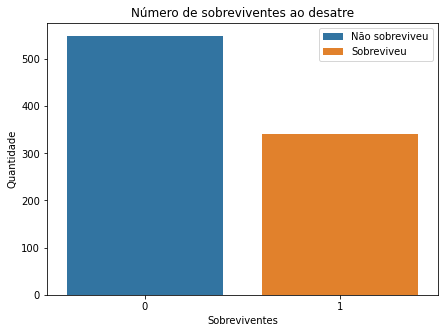

In [8]:
# Quantidade de sobreviventes ao desastre
plt.figure(figsize = (7,5))
sns.countplot(x = 'Survived', hue = 'Survived', data = treino, dodge = False)
plt.title("Número de sobreviventes ao desatre")
plt.legend(['Não sobreviveu', 'Sobreviveu'])
plt.xlabel("Sobreviventes")
plt.ylabel("Quantidade")

E a quantidade exata em total e frequência:

In [9]:
# A quantidade exata de sobreviventes:
print(treino['Survived'].value_counts())
print()
# A quantidade de sobreviventes em frequência:
print(treino["Survived"].value_counts(normalize = True))

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64


Assim, temos que para o nosso conjunto de dados inteiro, aproximadamente 61,61% dos passageiros não sobreviveram e 38,39% sobreviveram ao desastre

####Sobreviventes ('Survived')  vs  Sexo ('Sex'):

Ainda sobre essa variável e relacionando com variáveis categóricas como sexo e a classe social do passageiro, podemos ter informações mais específicas sobre os sobreviventes do desastre.

Primeiramente, olhemos a relação das variáveis 'Survived' e 'Sex'.

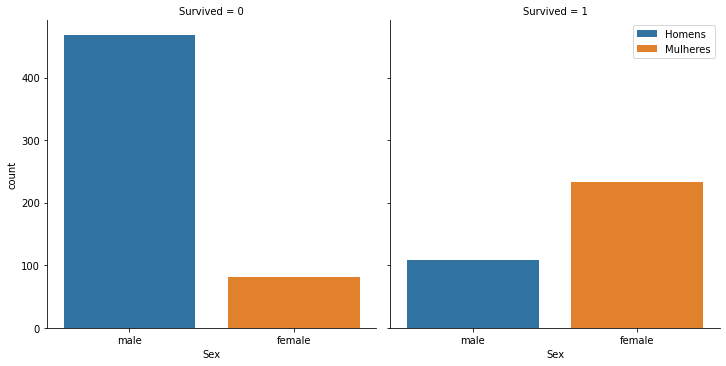

In [10]:
sns.catplot(x = "Sex", hue="Sex", col = 'Survived', data = treino, kind = "count", dodge = False, height=5, aspect=1)
plt.legend(['Homens', 'Mulheres'])

Obervamos claramente dessa maneira que mais homens não sobreviveram ao desastre enquanto que mais mulheres sobreviram. Para saber com exatidão, criaremos um Dataframe com a quantidade de sobreviventes por sexo:

In [11]:
# Determinando por sexo e se sobreviveu ou não
homens_n = len(treino[(treino.Sex == 'male') & (treino.Survived == 0)])
mulheres_n = len(treino[(treino.Sex == 'female') & (treino.Survived == 0)])
homens_s = len(treino[(treino.Sex == 'male') & (treino.Survived == 1)])
mulheres_s = len(treino[(treino.Sex == 'female') & (treino.Survived == 1)])

# Criando um dicionário com os valores acima
dados = {'Homem': [homens_n, homens_s, (homens_n + homens_s)],
        'Mulher': [mulheres_n, mulheres_s, (mulheres_n + mulheres_s)],
         'Total': [(homens_n + mulheres_n), (homens_s + mulheres_s), len(treino.Survived)]}

# Criando um Dataframe com o dicionário
sobreviventes = pd.DataFrame(dados, columns = ['Homem', 'Mulher', 'Total'], index = ['Não sobreviveu', 'Sobreviveu', 'Total'])  
sobreviventes

,Homem,Mulher,Total
Não sobreviveu,468,81,549
Sobreviveu,109,233,342
Total,577,314,891


Com o Dataframe acima podemos ter com exatidão os sobreviventes totais pelo seu sexo no conjunto de dados fornecido.

####Sobreviventes ('Survived') vs Classe social ('Pclass'):

Agora, analisaremos as relações das variáveis 'Survived' e 'Class', para ter uma ideia dos sobreviventes e suas condições sociais.

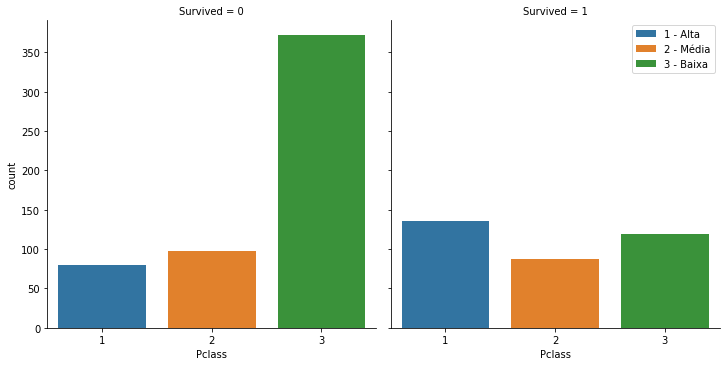

In [12]:
sns.catplot(x = "Pclass", hue="Pclass", col = 'Survived', data = treino, kind = "count", dodge = False, height=5, aspect=1)
plt.legend(['1 - Alta', '2 - Média', '3 - Baixa'])

Com o gráfico de barras acima podemos observar que dos passageiros que não sobreviveram, a maioria era de um *status* social menor (classe baixa) seguidos daqueles de classe média e por fim os de classe alta, que foram os que mais sobreviveram. Abaixo podemos olhar melhor para os números daqueles que sobreviveram ou não com sua classe social.

In [13]:
# Determinando por classe social e se sobreviveu ou não
classe_n = []
classe_s = []

# Loop pelas classes e aqueles que não sobreviveram
for i in range(1, 4):
  classe_n.append(len(treino[(treino.Pclass == i) & (treino.Survived == 0)]))

# Loop pelas classes e aqueles que sobreviveram
for i in range(1, 4):
  classe_s.append(len(treino[(treino.Pclass == i) & (treino.Survived == 1)]))

# Criando um dicionário com os valores acima
dados = {'Alta': [classe_n[0], classe_s[0], (classe_s[0] + classe_n[0])],
         'Média': [classe_n[1], classe_s[1], (classe_s[1] + classe_n[1])],
         'Baixa': [classe_n[2], classe_s[2], (classe_s[2] + classe_n[2])],
         'Total': [sum(classe_n), sum(classe_s), len(treino.Pclass)]}

# Criando um Dataframe com o dicionário
sobreviventes_classes = pd.DataFrame(dados, columns = ['Alta', 'Média', 'Baixa', 'Total'], index = ['Não sobreviveu', 'Sobreviveu', 'Total'])  
sobreviventes_classes

,Alta,Média,Baixa,Total
Não sobreviveu,80,97,372,549
Sobreviveu,136,87,119,342
Total,216,184,491,891


####Classe social ('Pclass') vs Sexo ('Sex'):

Agora, analisaremos como as classes sociais se distribuem com os sexos.

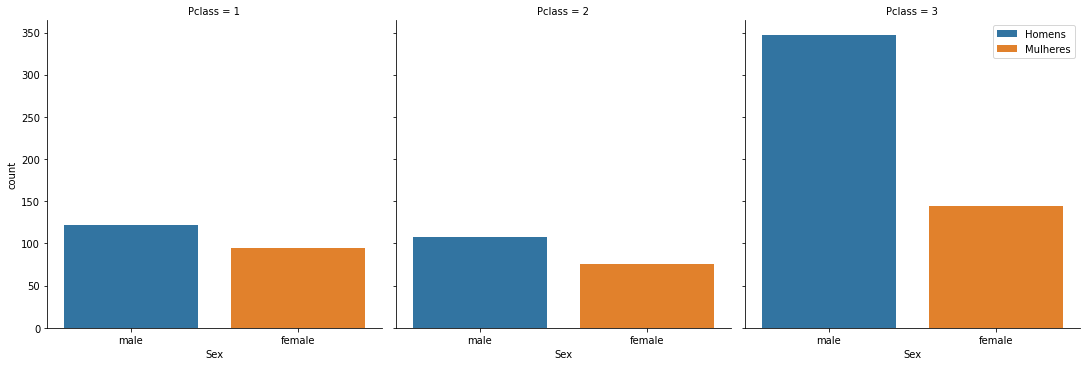

In [14]:
sns.catplot(x = "Sex", hue="Sex", col = 'Pclass', data = treino, kind = "count", dodge = False, height=5, aspect=1)
plt.legend(['Homens', 'Mulheres'])

Oberservamos que haviam muitos passageiros de classe baixa no navio e maioria era homem. Seguidos das pessoas de classe alta e por último aqueles de classe média. Em todas as classes, a quantidade de homens é superior ao número de mulheres.

Agora olhemos uma tabela com os resultados dos números exatos do *dataset*.

In [15]:
# Determinando por classe social e sexo
classe_h = []
classe_m = []

# Loop pelas classes e aqueles que são homens
for i in range(1, 4):
  classe_h.append(len(treino[(treino.Pclass == i) & (treino.Sex == 'male')]))

# Loop pelas classes e aqueles que são mulheres
for i in range(1, 4):
  classe_m.append(len(treino[(treino.Pclass == i) & (treino.Sex== 'female')]))

# Criando um dicionário com os valores acima
dados = {'Alta': [classe_h[0], classe_m[0], (classe_h[0] + classe_m[0])],
         'Média': [classe_h[1], classe_m[1], (classe_h[1] + classe_m[1])],
         'Baixa': [classe_h[2], classe_m[2], (classe_h[2] + classe_m[2])],
         'Total': [sum(classe_h), sum(classe_m), len(treino.Pclass)]}

# Criando um Dataframe com o dicionário
classes_sex = pd.DataFrame(dados, columns = ['Alta', 'Média', 'Baixa', 'Total'], index = ['Homem', 'Mulher', 'Total'])  
classes_sex

,Alta,Média,Baixa,Total
Homem,122,108,347,577
Mulher,94,76,144,314
Total,216,184,491,891


Com a tabela acima podemos ter uma ideia mais exata da quantidade de homens e mulheres por classe social presentes no navio e confirmar o que observamos no gráfico anterior.

Agora, analisemos algumas variáveis numéricas.

##Variáveis Numéricas

Como primeira variável numérica, iremos analisar a variável 'Age', que é uma variável contínua e representa a idade dos passageiros em anos.

###Idade ('Age'):

Comecemos plotando um histograma para essa variável.

Text(0, 0.5, 'Quantidade')

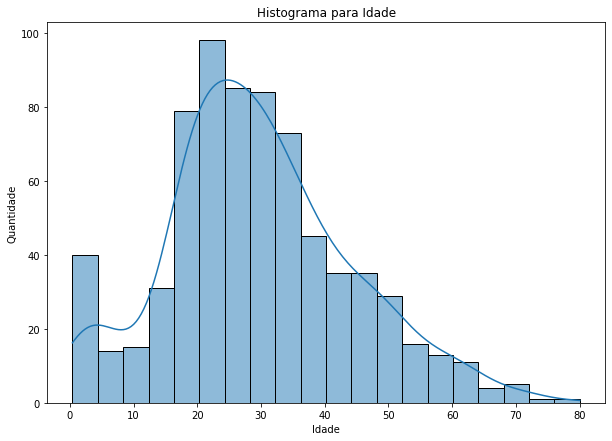

In [16]:
# Plotando histograma para variável contínua 'Age'
plt.figure(figsize = (10,7))
sns.histplot(x = treino['Age'], kde = True)
plt.title("Histograma para Idade")
plt.xlabel('Idade')
plt.ylabel('Quantidade')

No histograma acima utilizamos o kde (kernel density estimator) para estimar a função de densidade para esse histograma. Para mais informações descritivas podemos agora plotar um *boxplot*.

Text(0, 0.5, 'Idade')

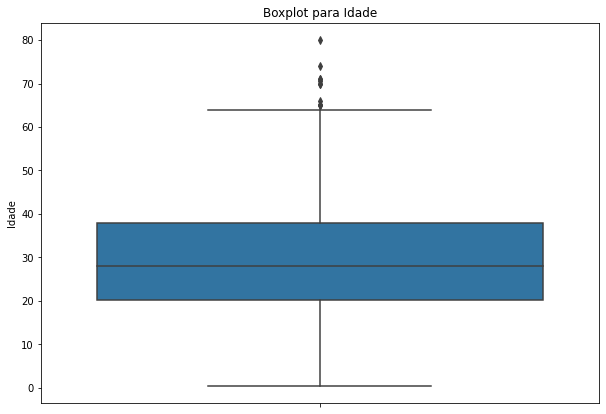

In [17]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Age', data = treino)
plt.title("Boxplot para Idade")
plt.ylabel('Idade')

Com o boxplot temos muitas informações importantes sobre essa variável. Por exemplo, podemos confirmar o que dissemos acima sobre a maioria das pessoas serem jovens como pode-se perceber pelos quartis, com uma idade média de 28 anos. Além disso, como 75% dos passageiros tem até 40 anos, idades muito superiores foram vistas como *outliers* (valores discrepantes).

Por último, vale notar a presença de valores faltando (*missing values*):

In [18]:
# Quantidade de missing values na variável 'Age'
print("Número de missing values: ", treino['Age'].isna().sum())
print("Em relação ao total das observações: ", round((treino['Age'].isna().sum())/len(treino['Age']) * 100, 3) , "%")

Número de missing values:  177
Em relação ao total das observações:  19.865 %


Para tratar esse problema, faremos o *input* nos valores *missing* utilizando a mediana das observações para essa variável, uma vez que percebemos a presença de *outliers* nos dados visto no boxplot. A mediana será usada pois é menos afetada aos *outliers* que a média, podendo fornecer uma distorção nos dados muito maior.

In [19]:
# Inputando a mediana nos valores que estão faltando
treino['Age'] = treino['Age'].fillna(value = treino['Age'].median())
print("Número de missing values: ", treino['Age'].isna().sum())

Número de missing values:  0


Text(0, 0.5, 'Quantidade')

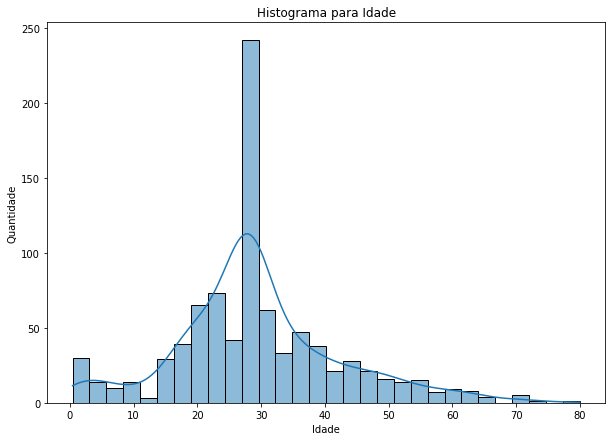

In [20]:
# Plotando histograma para variável contínua 'Age'
plt.figure(figsize = (10,7))
sns.histplot(x = treino['Age'], kde = True)
plt.title("Histograma para Idade")
plt.xlabel('Idade')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Idade')

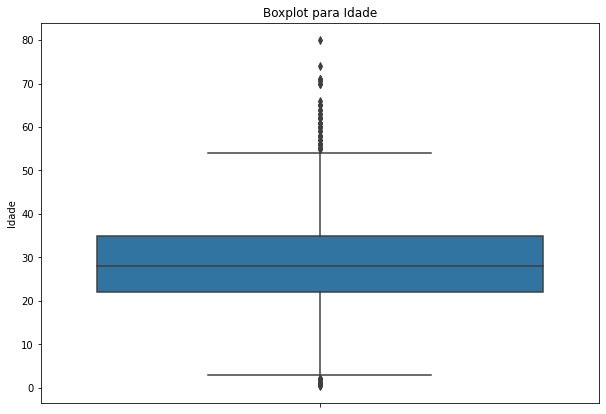

In [21]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Age', data = treino)
plt.title("Boxplot para Idade")
plt.ylabel('Idade')